# Распределение Парето

In [251]:
#Импортирование необходимых библиотек
from scipy.stats import pareto
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [295]:
#Генерация выборки
k = 7
xm = 4
disterb = pareto(k, scale=xm)
sample = disterb.rvs(size=1000)

Text(0, 0.5, 'pdf')

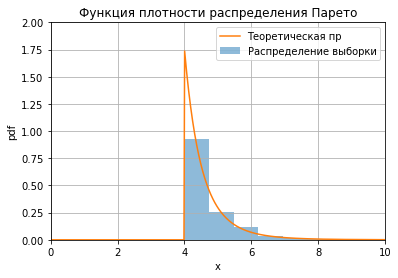

In [297]:
#гистограмма выборки
plt.hist(sample, density=True, histtype='stepfilled', alpha=0.5, label='Распределение выборки')

#теоретическая плостность распределения
x = np.linspace(0,20,1000)
pdf = disterb.pdf(x)
plt.plot(x, pdf, label='Теоретическая пр')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 2])
plt.title('Функция плотности распределения Парето')
plt.xlabel('x')
plt.ylabel('pdf')

In [300]:
#количество выборок
sampleNum = 1000

#массив объёма выборок
sampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros((len(sampleVolume), sampleNum))

#вычисление выборочных средних значений и занесение в массив
for i in range(len(sampleVolume)):
    for j in range(sampleNum):
        distributionSampleTemp = np.array(pareto.rvs(k,scale=xm, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean

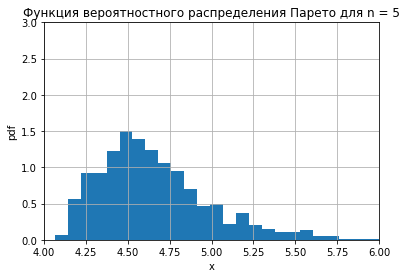

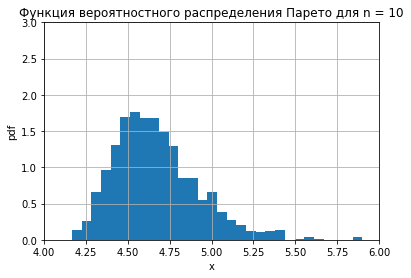

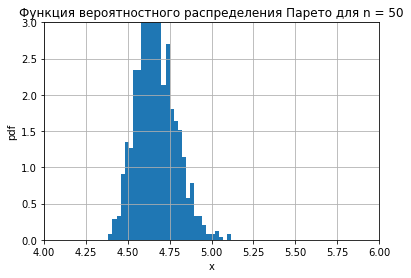

In [321]:
#Гистограмма выборки
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([4, 6, 0, 3])
    plt.title('Функция вероятностного распределения Парето для n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()

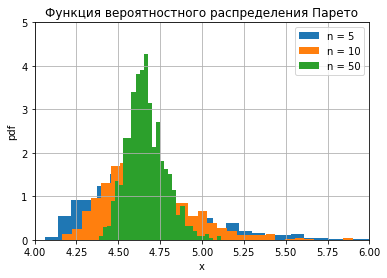

In [320]:
#Графики вместе
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([4, 6, 0, 5])
    plt.title('Функция вероятностного распределения Парето')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

# Значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

In [316]:
#Математическое ожидание
distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in range( len(sampleVolume) ):
    distributionSampleVariance[i] = ((xm/k-1)**2)*(k/(k-2))/sampleVolume[i]
    
print('Математическое ожидание: ' + str(distributionSampleMean))
for i in range( len(sampleVolume) ):
    print('Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 4.666666666666667
Дисперсия для n = 5: 0.051428571428571435
Дисперсия для n = 10: 0.025714285714285717
Дисперсия для n = 50: 0.0051428571428571435


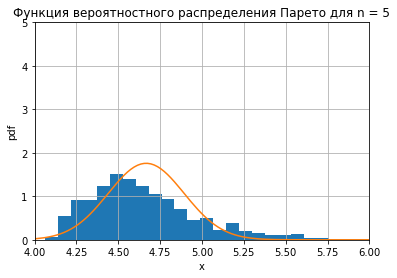

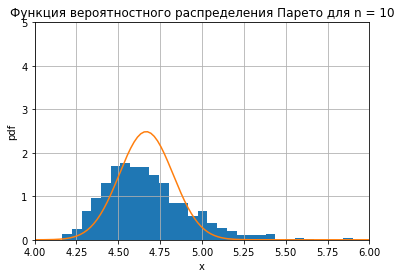

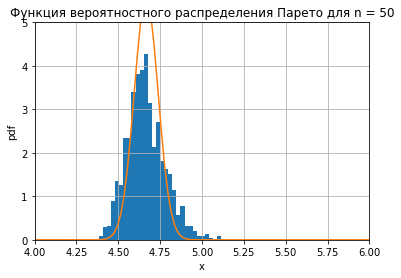

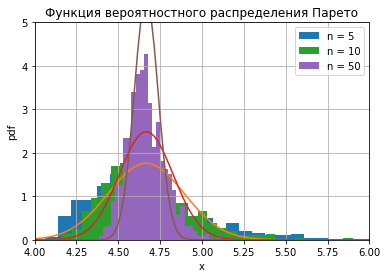

In [319]:
#Пришлось импортировать доп.библиотеки
# можно было бы сделать это в начале, но я и так уже облопошился один раз с pareto, поэтому было лень=)
from math import sqrt
import scipy.stats as sts
#гистограммы выборки
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([4, 6, 0, 5])
    plt.title('Функция вероятностного распределения Парето для n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([4, 6, 0, 5])
    plt.title('Функция вероятностного распределения Парето')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

# Вывод

Распределение выборочных средних удалось описать достаточно точно с помощью нормального распределения.

С ростом количества выборок, точность приближения растёт